## Bussines Problem
The Financial Technology company (Fin-Tech Company) launch there a mobile app. This app used for financial purposes like bank loans, savings, etc. in one place. It has two versions free and premium. The free version app contains basic features and customer wants to use the premium feature then they have to pay some amount to unlock it.
The main goal of the company is to sell the premium version app with low advertisement cost but they don’t know how to do it. That’s a reason they are provided the premium feature in the free version app for 24 hours to collect the customer’s behavior. After that, the company hired the Machine Learning Engineer to find insight from the collected data (customer’s behavior).

The job of the ML engineer is to find or predict new customer who is interested to buy the product or not. If the customers will buy a product anyway so no need to give an offer to that customer and loss the business. Only give offers to those customers who are interested to use premium version app but they can’t afford its cost. So the company will give offers to those customers and earn more money.

# Goal of the project :

The "FinTech" company launch there android and iOS mobile base app and want to grow there business. But there is problem how to recomended this app and offer who realy want to use it. So for that company desided to give free trial to each and every customer for 24 houre and collect data from the customers. In this senariao some customer purchase the app and someone not. According to this data company want to give special offer to the customer who are not interested to buy without offer and grow thre business.

In [1]:
import pandas as pd #For Data Analysis and manuplation
import numpy as np #For numeric calculation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from dateutil import parser # convert time in date time data type

In [2]:
fin = pd.read_csv('FineTech_appData.csv')
fin.shape

(50000, 12)

The Bussiness dataset contains 50000 customers information with 12 features.

In [3]:
fin.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
fin.tail()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0
49999,27047,2012-12-14 01:22:44.638,4,01:00:00,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,0,0,NaN,1


In [5]:
for i in [1,2,3,4,5]:
    print(fin.loc[i,'screen_list'],'\n')

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3 



In [6]:
fin.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

The enrolled_date column has total 18926 null values

In [7]:
fin.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [8]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


All columns have 50,000 non-null values except enrolled_date. It has 31,074 non-null. There is a total of 8 columns that contain integer 64 bit (int64) values and the remaining 4 are object type.

In [9]:
fin.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


From the output,
1.The mean age of customer 31.72 only 10.7 customers played minigame and 17.2 customer used premium feature
and 62.14 customers enrolled and likes 16.5%

In [10]:
features = fin.columns
for i in features:
    print(""""Unique value of {}\n{}\nlen is {} \n........................\n
          """.format(i, fin[i].unique(), len(fin[i].unique())))

"Unique value of user
[235136 333588 254414 ... 302367 324905  27047]
len is 49874 
........................

          
"Unique value of first_open
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']
len is 49747 
........................

          
"Unique value of dayofweek
[3 6 1 4 2 0 5]
len is 7 
........................

          
"Unique value of hour
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']
len is 24 
........................

          
"Unique value of age
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50

In the above output, we got information about the ‘dayofweek’ and ‘hour’ columns. The customer registers the app each day of the week and 24 hours.

The ‘hour’ column contains object data type, so we converted into integer data type format.



In [11]:
#  hour data convert string to int
fin['hour'] = fin.hour.str.slice(1,3).astype(int) 
 
# get data type of each columns
fin.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

To visualize the data need numeric values for that we drop some columns that datatype is the object.

In [12]:
# drop object dtype columns
fin2 = fin.drop(['user', 'first_open', 'screen_list', 'enrolled_date'], axis = 1)

In [13]:
fin2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1


## Data visualization
Heatmap using the correlation matrix

Text(0.5, 1, 'fin_tech_app2')

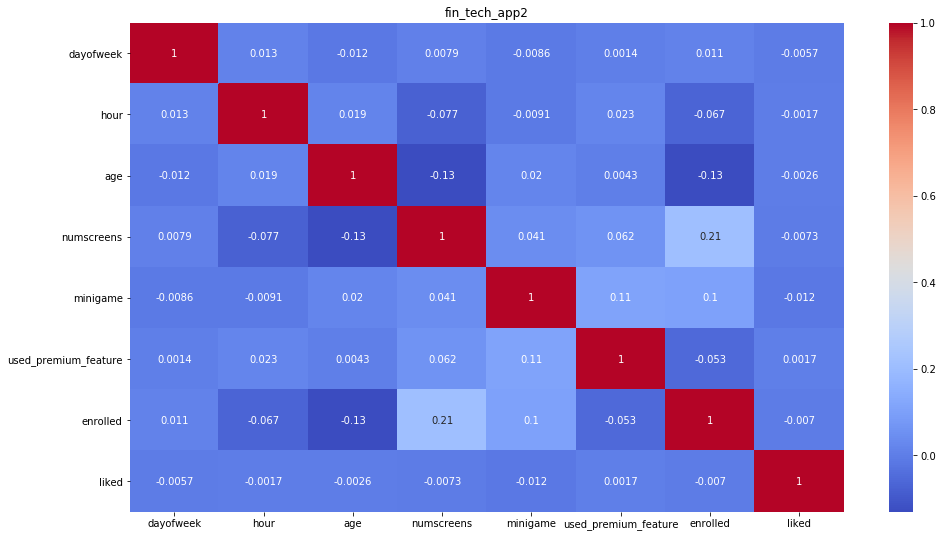

In [14]:
plt.figure(figsize=(16,9))
sns.heatmap(fin2.corr(),annot = True, cmap ='coolwarm')
plt.title('fin_tech_app2')


In the fine_tech_app2 dataset, there is no strong correlation between any features. There is little correlation between ‘numscreens’ and ‘enrolled’. It means that those customers saw more screen they are taking premium app. There is a slight correlation between ‘minigame’ with ‘enrolled’ and ‘used_premium_feature’. The slightly negative correlation between ‘age’ with ‘enrolled’ and ‘numscreens’. It means that older customers do not use the premium app and they don’t see multiple screens.

## Pair plot

The pair plot helps to visualize the distribution of data and scatter plot.

C:\Users\OMKARA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\OMKARA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


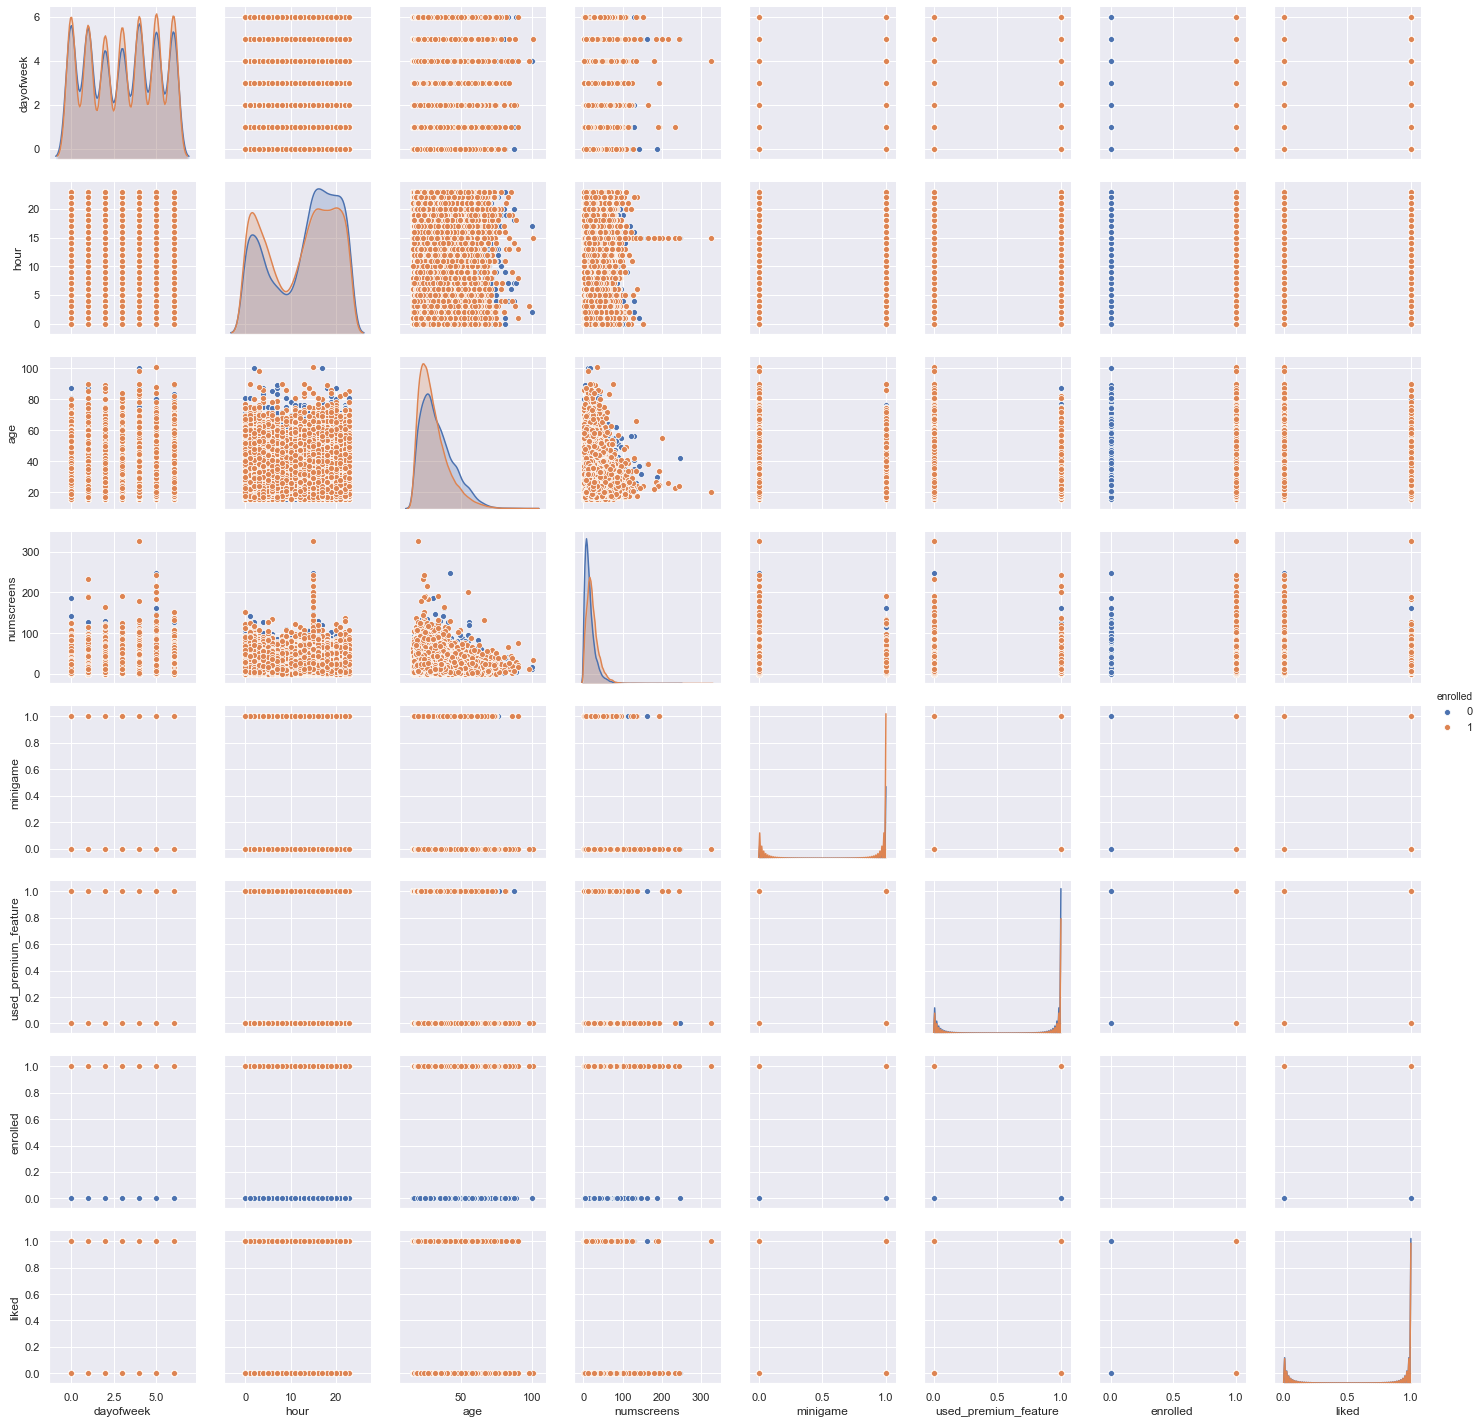

In [120]:
sns.pairplot(fin2,hue = 'enrolled')

in pair plot we can see there are two values 0 and 1 and orange dots show the enrolled customers
features.
so now we can visualize the coutplot of enrolled data

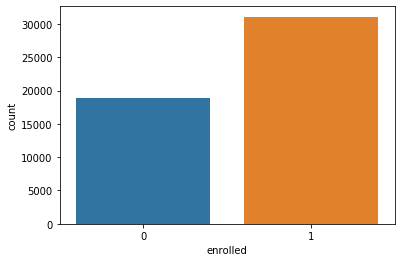

In [16]:
sns.countplot(fin2.enrolled)

Here you can see the exact value of enrolled & not enrolled customers.

In [17]:
# value enrolled and not enrolled customers
print("Not enrolled user = ", (fin2.enrolled < 1).sum(), "out of 50000")
print("Enrolled user = ",50000-(fin2.enrolled < 1).sum(),  "out of 50000")

Not enrolled user =  18926 out of 50000
Enrolled user =  31074 out of 50000


In pair plot, we saw the distribution of each feature but here we visualize in the histogram to understand easily.

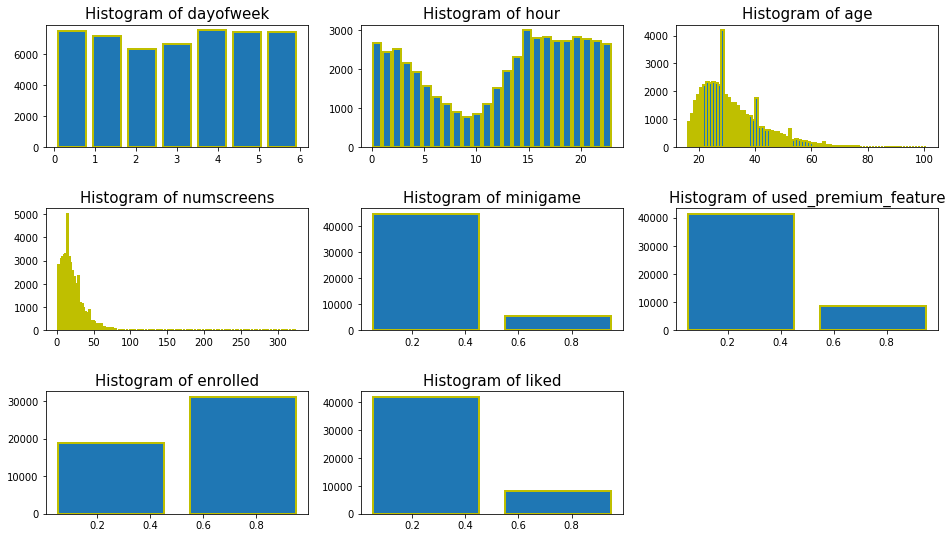

In [18]:
# plot histogram 
 
plt.figure(figsize = (16,9)) # figure size in ratio 16:9
features = fin2.columns # list of columns name
for i,j in enumerate(features): 
    plt.subplot(3,3,i+1) # create subplot for histogram
    plt.title("Histogram of {}".format(j), fontsize = 15) # title of histogram
     
    bins = len(fin2[j].unique()) # bins for histogram
    plt.hist(fin2[j], bins = bins, rwidth = 0.8, edgecolor = "y", linewidth = 2, ) # plot histogram
     
plt.subplots_adjust(hspace=0.5) # space between horixontal axes (subplots)


In the above histogram, we can see minigame, used_primium_feature, enrolled, and like they have only two values and how they distributed.

The histogram of ‘dayofweek’ shows, on Tuesday and Wednesday slightly fewer customer registered the app.

The histogram of ‘hour’ shows the less customer register on the app around 10 AM.

The ‘age’ histogram shows, the maximum customers are younger.

mThe ‘numsreens’ histogram shows the few customers saw more than 40 screens.

Correlation barplot with ‘enrolled’ feature

Now we are trying to know which feature is strongly correlated with ‘enrolled’ feature with positive or negative through barplot.

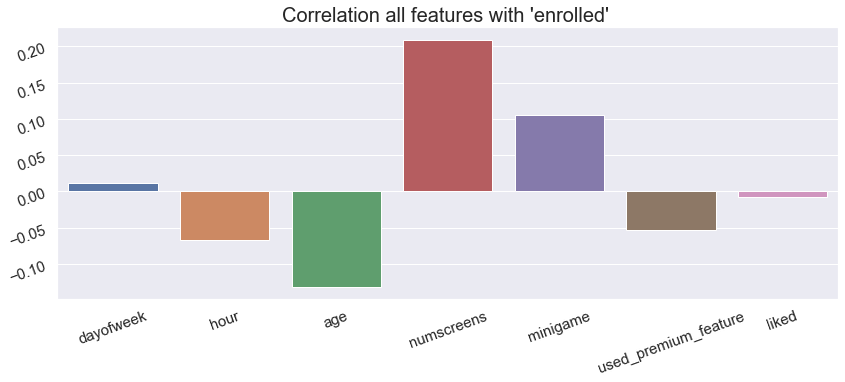

In [19]:
# show corelation barplot 
 
sns.set() # set background dark grid
plt.figure(figsize = (14,5))
plt.title("Correlation all features with 'enrolled' ", fontsize = 20)
fin3 = fin2.drop(['enrolled'], axis = 1) # drop 'enrolled' feature
ax =sns.barplot(fin3.columns,fin3.corrwith(fin2.enrolled)) # plot barplot 
ax.tick_params(labelsize=15, labelrotation = 20, color ="k") # decorate x &amp; y ticks font


We saw the heatmap correlation matrix but this was not showing correlation clearly but you can easily understand which feature is how much correlated with ‘enrolled’ feature using the above barplot.

The ‘numscreens’ and ‘minigame’ is strongly positively correlated with ‘enrolled’ feature than other feature.

The ‘hour’, ‘age’ and ‘used_premium_feature’ are strongly negatively correlated with the ‘enrolled’ feature.

Now, we are parsing ‘first_open’ and ‘enrolled_date’ object data in data and time format.

In [20]:
# parsinf object data into data time format
 
fin['first_open'] =[parser.parse(i) for i in fin['first_open']]
 
fin['enrolled_date'] =[parser.parse(i) if isinstance(i, str) else i for i in fin['enrolled_date']]
 
fin.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

We are finding how much time the customer takes to get enrolled in the premium feature app after registration. For that subtract ‘fin.first_open’ from ‘fin.enrolled_date’ and set data type as timedelta64 in hours.

In [21]:
fin['time_to_enrolled']  = (fin.enrolled_date - fin.first_open).astype('timedelta64[h]')


Showing the distribution of time taken to enrolled the app.

(array([2.8195e+04, 1.0320e+03, 5.6700e+02, 4.2500e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([   0. ,  543.4, 1086.8, 1630.2, 2173.6, 2717. , 3260.4, 3803.8,
        4347.2, 4890.6, 5434. ]),
 <a list of 10 Patch objects>)

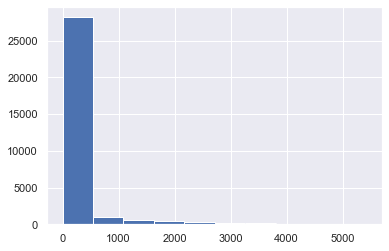

In [22]:
# Plot histogram
plt.hist(fin['time_to_enrolled'].dropna())

let’s try to show the distribution in range 0 to 100 hours.

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

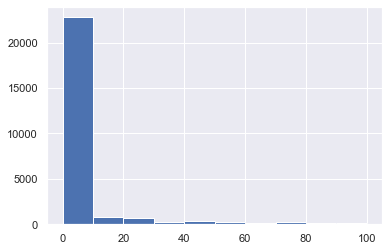

In [23]:
# Plot histogram
plt.hist(fin['time_to_enrolled'].dropna(), range = (0,100)) 

In the above histogram, we know the maximum customers have enrolled the app in 10 hours from the registration.

## Feature selection
We are considering those customers have enrolled after 48 hours as 0.

In [24]:
# Those customers have enrolled after 48 hours set as 0
fin.loc[fin.time_to_enrolled > 48, 'enrolled'] = 0

In [25]:
fin.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,time_to_enrolled
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


Drop some ‘time_to_enrolled’, ‘enrolled_date’, ‘first_open’ feature they are not strongly correlated to the result.

In [26]:
fin.drop(columns = ['time_to_enrolled', 'enrolled_date', 'first_open'], inplace=True)

In [27]:
fin.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


Read another CSV file that contains the top screens name.

In [28]:
fin_app = pd.read_csv("/Users/OMKARA/Documents/Fin_Teck_company data/top_screens.csv").top_screens.values

In [29]:
fin_app

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

Add ‘,’ at the end of each string of ‘screen_list’ for further operation.

In [30]:
fin['screen_list'] = fin.screen_list.astype(str) + ','

In [31]:
fin

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan,",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
5,56480,2,9,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,0
6,144649,1,2,35,"product_review,product_review2,ScanPreview,",3,0,0,0,0
7,249366,1,3,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,0
8,372004,2,14,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,0,0
9,338013,4,18,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,0


The ‘Screen_list’ contains string values but we can’t use it directly. So to solve this problem we are taking each screen name from ‘fin_app’ and append as a column by the same name to ‘fin’. Then check this screen name is available in ‘screen_list’ if it is available then add value 1 else 0 in the appended column.

In [32]:
# string into to number

for screen_name in fin_app:
    fin[screen_name] = fin.screen_list.str.contains(screen_name).astype(int)
    fin['screen_list'] = fin.screen_list.str.replace(screen_name+",", "")

In [33]:
# test
fin.screen_list.str.contains('Splash').astype(int)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
49970    0
49971    0
49972    0
49973    0
49974    0
49975    0
49976    0
49977    0
49978    0
49979    0
49980    0
49981    0
49982    0
49983    0
49984    0
49985    0
49986    0
49987    0
49988    0
49989    0
49990    0
49991    0
49992    0
49993    0
49994    0
49995    0
49996    0
49997    0
49998    0
49999    0
Name: screen_list, Length: 50000, dtype: int32

In [34]:
# test
fin.screen_list.str.replace('Splash'+",", "")

0        joinscreen,product_review,ScanPreview,VerifyTo...
1        joinscreen,product_review,product_review2,Scan...
2                                                         
3        product_review,Home,product_review,ReferralCon...
4        joinscreen,ScanPreview,VerifySSN,Home,SelectIn...
5        Home,ScanPreview,VerifySSN,product_review,prod...
6              product_review,product_review2,ScanPreview,
7        Home,product_review,product_review2,ScanPrevie...
8        product_review,product_review2,ScanPreview,Ver...
9        Home,product_review,product_review,product_rev...
10            Home,Settings,product_review,product_review,
11       product_review,Home,SelectInstitution,product_...
12       joinscreen,product_review,product_review2,Scan...
13                                                   Home,
14       joinscreen,product_review,product_review2,Scan...
15       joinscreen,product_review,product_review2,Veri...
16       product_review,product_review,product_review,p.

In [35]:
# get shape
fin.shape

(50000, 68)

In [36]:
fin.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# remain screen in 'screen_list'
fin.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [38]:
fin.screen_list.str.count(",").head(6)

0     7
1     5
2     0
3     6
4    10
5     6
Name: screen_list, dtype: int64

In [39]:
# count remain screen list and store counted number in 'remain_screen_list'

fin['remain_screen_list'] = fin.screen_list.str.count(",")

In [41]:
# Drop the 'screen_list'
fin.drop(columns = ['screen_list'], inplace = True)

In [42]:
fin

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10
5,56480,2,9,20,14,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,6
6,144649,1,2,35,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
7,249366,1,3,26,41,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,8
8,372004,2,14,29,33,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,19
9,338013,4,18,26,19,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,11


In [43]:
fin.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [44]:
# take sum of all saving screen in one place
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
fin['saving_screens_count'] = fin[saving_screens].sum(axis = 1)
fin.drop(columns = saving_screens, inplace = True)

In [45]:
fin

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,6,0
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,10,0
5,56480,2,9,20,14,0,0,1,0,1,...,0,0,0,0,0,0,0,0,6,0
6,144649,1,2,35,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
7,249366,1,3,26,41,0,1,0,0,1,...,0,0,0,0,0,1,0,0,8,0
8,372004,2,14,29,33,1,1,0,0,1,...,0,0,0,1,0,0,0,0,19,0
9,338013,4,18,26,19,0,0,1,0,1,...,0,0,0,0,0,0,0,0,11,0


In [46]:
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
fin['credit_screens_count'] = fin[credit_screens].sum(axis = 1)
fin.drop(columns = credit_screens, axis = 1, inplace = True)

In [47]:
fin

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,7,0,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,5,0,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,6,0,3
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,10,0,2
5,56480,2,9,20,14,0,0,1,0,1,...,0,0,0,0,0,0,0,6,0,2
6,144649,1,2,35,3,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
7,249366,1,3,26,41,0,1,0,0,1,...,0,0,0,0,1,0,0,8,0,2
8,372004,2,14,29,33,1,1,0,0,1,...,0,0,1,0,0,0,0,19,0,0
9,338013,4,18,26,19,0,0,1,0,1,...,0,0,0,0,0,0,0,11,0,0


In [48]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
fin['cc_screens_count'] = fin[cc_screens].sum(axis = 1)
fin.drop(columns = cc_screens, inplace = True)

In [49]:
fin

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,7,0,0,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,5,0,0,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,6,0,3,0
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,10,0,2,0
5,56480,2,9,20,14,0,0,1,0,1,...,0,0,0,0,0,0,6,0,2,0
6,144649,1,2,35,3,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
7,249366,1,3,26,41,0,1,0,0,1,...,0,0,0,1,0,0,8,0,2,0
8,372004,2,14,29,33,1,1,0,0,1,...,0,1,0,0,0,0,19,0,0,0
9,338013,4,18,26,19,0,0,1,0,1,...,0,0,0,0,0,0,11,0,0,0


In [50]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
fin['loan_screens_count'] = fin[loan_screens].sum(axis = 1)
fin.drop(columns = loan_screens, inplace = True)

In [51]:
fin

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1
5,56480,2,9,20,14,0,0,1,0,0,...,0,0,0,0,0,6,0,2,0,1
6,144649,1,2,35,3,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
7,249366,1,3,26,41,0,1,0,0,0,...,0,0,1,0,0,8,0,2,0,1
8,372004,2,14,29,33,1,1,0,0,1,...,0,0,0,0,0,19,0,0,0,3
9,338013,4,18,26,19,0,0,1,0,1,...,0,0,0,0,0,11,0,0,0,1


In [52]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
user                       50000 non-null int64
dayofweek                  50000 non-null int64
hour                       50000 non-null int32
age                        50000 non-null int64
numscreens                 50000 non-null int64
minigame                   50000 non-null int64
used_premium_feature       50000 non-null int64
enrolled                   50000 non-null int64
liked                      50000 non-null int64
location                   50000 non-null int32
Institutions               50000 non-null int32
VerifyPhone                50000 non-null int32
BankVerification           50000 non-null int32
VerifyDateOfBirth          50000 non-null int32
ProfilePage                50000 non-null int32
VerifyCountry              50000 non-null int32
Cycle                      50000 non-null int32
idscreen                   50000 non-null int32
Splash                     

In [53]:
fin.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,saving_screens_count,credit_screens_count,cc_screens_count,loan_screens_count
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


## Heatmap with correlation matrix of new fin data

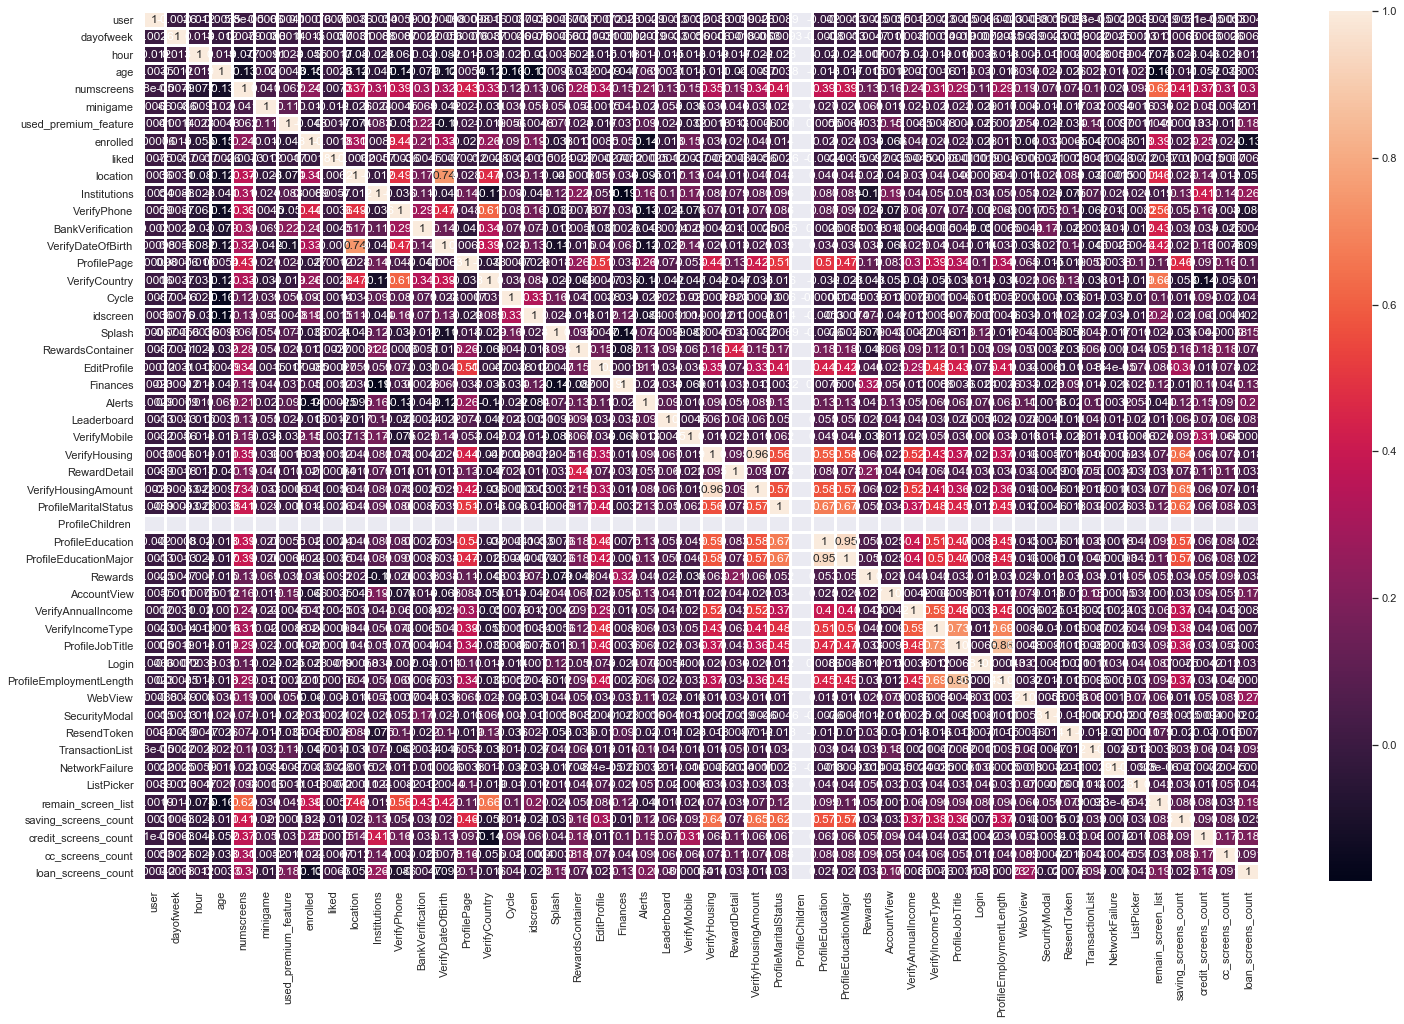

In [57]:
plt.figure(figsize = (25,16)) 
sns.heatmap(fin.corr(), annot = True, linewidth =2)

In [58]:
fin['ProfileChildren '].unique()

array([0], dtype=int64)

In [59]:
corr_matrix = fin.corr()
corr_matrix['ProfileChildren ']

user                      NaN
dayofweek                 NaN
hour                      NaN
age                       NaN
numscreens                NaN
minigame                  NaN
used_premium_feature      NaN
enrolled                  NaN
liked                     NaN
location                  NaN
Institutions              NaN
VerifyPhone               NaN
BankVerification          NaN
VerifyDateOfBirth         NaN
ProfilePage               NaN
VerifyCountry             NaN
Cycle                     NaN
idscreen                  NaN
Splash                    NaN
RewardsContainer          NaN
EditProfile               NaN
Finances                  NaN
Alerts                    NaN
Leaderboard               NaN
VerifyMobile              NaN
VerifyHousing             NaN
RewardDetail              NaN
VerifyHousingAmount       NaN
ProfileMaritalStatus      NaN
ProfileChildren           NaN
ProfileEducation          NaN
ProfileEducationMajor     NaN
Rewards                   NaN
AccountVie

In [60]:
fin['ProfileChildren ']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
49970    0
49971    0
49972    0
49973    0
49974    0
49975    0
49976    0
49977    0
49978    0
49979    0
49980    0
49981    0
49982    0
49983    0
49984    0
49985    0
49986    0
49987    0
49988    0
49989    0
49990    0
49991    0
49992    0
49993    0
49994    0
49995    0
49996    0
49997    0
49998    0
49999    0
Name: ProfileChildren , Length: 50000, dtype: int32

# # Split dataset in train and Test

In [61]:
clean_fin = fin
target = fin['enrolled'] 
fin.drop(columns = 'enrolled', inplace = True)

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(fin,target,test_size = 0.3, random_state = 123)

In [65]:
print('shape of X_train = ', X_train.shape)
print('shape of X_test = ', X_test.shape)
print('shape of y_train = ', y_train.shape)
print('shape of y_test = ', y_test.shape)

shape of X_train =  (35000, 49)
shape of X_test =  (15000, 49)
shape of y_train =  (35000,)
shape of y_test =  (15000,)


In [66]:
# take User ID in another variable 
train_userID = X_train['user']
X_train.drop(columns= 'user', inplace =True)
test_userID = X_test['user']
X_test.drop(columns= 'user', inplace =True)

C:\Users\OMKARA\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [67]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of train_userID = ', train_userID.shape)
print('Shape of test_userID = ', test_userID.shape)

Shape of X_train =  (35000, 48)
Shape of X_test =  (15000, 48)
Shape of train_userID =  (35000,)
Shape of test_userID =  (15000,)


# Feature Scaling

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Model Building

In [73]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Decison Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

accuracy_score(y_test, y_pred_dt)

0.7037333333333333

In [77]:
# train with Standerd Scaling dataset
dt2 = DecisionTreeClassifier()
dt2.fit(X_train_sc, y_train)
y_pred_dt_sc = dt2.predict(X_test_sc)

accuracy_score(y_test, y_pred_dt_sc)

0.7010666666666666

## KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

accuracy_score(y_test, y_pred_knn)

0.6898

In [81]:
knn2 = KNeighborsClassifier()
knn2.fit(X_train_sc,y_train)
y_pred_knn_sc = knn2.predict(X_test_sc)

accuracy_score(y_test, y_pred_knn_sc)

0.7348

## Naive Bayes

In [85]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

accuracy_score(y_test, y_pred_nb)

0.7179333333333333

In [89]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train_sc,y_train)
y_pred_nb_sc = nb.predict(X_test_sc)

accuracy_score(y_test,y_pred_nb_sc)

0.7179333333333333

## Random Forest

In [94]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

accuracy_score(y_test, y_pred_rf)

C:\Users\OMKARA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7605333333333333

In [97]:
# train with Standard Scaling dataset
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf.fit(X_train_sc, y_train)
y_pred_rf_sc = rf.predict(X_test_sc)

accuracy_score(y_test, y_pred_rf_sc)

0.7651333333333333

## Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

accuracy_score(y_test, y_pred_lr)

C:\Users\OMKARA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7645333333333333

In [103]:
# train with Standard Scaling dataset
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_sc, y_train)
y_pred_lr_sc = lr.predict(X_test_sc)

accuracy_score(y_test, y_pred_lr_sc)

C:\Users\OMKARA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7646666666666667

## Support vector machine

In [106]:
# Support Vector Machine
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

accuracy_score(y_test, y_pred_svc)

C:\Users\OMKARA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7552666666666666

In [107]:
# train with Standerd Scaling dataset
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_sc, y_train)
y_pred_svc_sc = svc.predict(X_test_sc)

accuracy_score(y_test, y_pred_svc_sc)

C:\Users\OMKARA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7768

## XG Boost

In [109]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

accuracy_score(y_test, y_pred_xgb)

0.7756666666666666

# Mapping predicted output to the target

In [113]:
final_result = pd.concat([test_userID, y_test], axis = 1)
final_result['predicted result'] = y_pred_xgb

final_result

,user,enrolled,predicted result
11872,260825,0,1
40828,127997,0,0
36400,260859,0,0
5166,95607,0,0
30273,117653,0,0
31249,282811,0,0
21872,264980,0,0
47728,182143,1,1
7261,195611,0,0
6456,260803,1,1


# Save The Model

In [116]:
import pickle

In [117]:
# save model
pickle.dump(xgb, open('FineTech_app_ML_model.pickle', 'wb'))

# load model
ml_model_pl = pickle.load(open('FineTech_app_ML_model.pickle', 'rb'))

# predict the output
y_pred_pl = ml_model_pl.predict(X_test)


# show the accuracy
print("Accuracy of model = ",accuracy_score(y_test, y_pred_pl))


Accuracy of model =  0.7756666666666666
